### IMDB - Preprocessing and Training

Use csv from EDA notebook to further clean, preprocess and create Train/Test split.  Many steps of preprocessing have already been formed in EDA notebook.  For example, the Genres Categorical feature has been transformed using Pandas get_dummies.  Additionally, unimportant features have already been dropped and records without Rating, our label have been dropped as well. 

In [15]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# import csv from EDA
df = pd.read_csv('cleandata/IMDb_modeling.csv', index_col=False)
df.head()

,averageRating,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,runtime30,yearScale
0,6.4,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,3.933333,12.0
1,7.3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.333333,19.0
2,6.5,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3.333333,1.0
3,6.8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2.600000,1.0
4,7.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3.233333,11.0


The 3 columns we want to look at regarding scaling are averageRating, runtime30 and yearScale.
1. averageRating - this is our label.  Our goal is to identify features that result is an averageRating of 6.5 or better.  For this, we are going to create a ratingBinary column with value 1 for >= 6.5 and 0 for all others.
2. runTime30 - first we will round this to 0 decs and then look at this feature using a histogram to see if it fits a normal curve and then scale it accordingly
3. yearScale - we created this column previously by subtracting 1989 from the actual year as we are only reviewing movies from 1990 to present. (Question - does this require scaling?)

In [17]:
#check range of averageRating
print(df['averageRating'].min(), df['averageRating'].max())

1.0 10.0


In [18]:
df['ratingBin'] = pd.cut(x=df['averageRating'], bins=[0,6.5,10], labels=[0,1]).astype('bool')
df.head()

,averageRating,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,runtime30,yearScale,ratingBin
0,6.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3.933333,12.0,0
1,7.3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.333333,19.0,1
2,6.5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3.333333,1.0,0
3,6.8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2.600000,1.0,1
4,7.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,3.233333,11.0,1


In [19]:
#looks good, we'll drop averageRating
df.drop(columns=['averageRating'], inplace=True)
df.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,runtime30,yearScale,ratingBin
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3.933333,12.0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.333333,19.0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3.333333,1.0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2.600000,1.0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3.233333,11.0,1


In [20]:
df['runtime30'] = df['runtime30'].round(0)
df['runtime30'].head()

0    4.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: runtime30, dtype: float64

(array([1.2000e+01, 3.1000e+01, 9.3870e+03, 4.2296e+04, 1.2024e+04,
        1.8250e+03, 4.2300e+02, 8.1000e+01, 4.5000e+01, 2.6000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

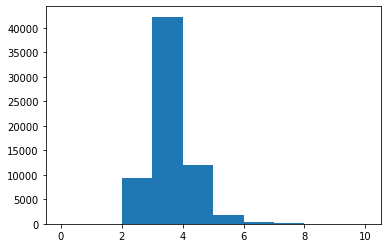

In [21]:
# Evaluate runtime30
plt.hist(df['runtime30'])

In [22]:
#the above histogram looks very tight in the middle, thus we should be able to use the StandardScaler from sklearn.

In [23]:
#skipping scaledYears as we want to maintain these values.  During modeling we may want to revisit how we handle the years.

Before we use our StandardScaler, we will first create out Train/Test split.  We will then fit/transform on the Train set and only transorm on the Test set


In [24]:
#import packages from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ratingBin'])
y = df['ratingBin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=14)

ss = StandardScaler()
ss.fit(X_train[['runtime30']])
#X_train['runtime30_sc'] = ss.transform(X_train[['runtime30']])
#X_test['runtime30_sc'] = ss.transform(X_test[['runtime30']])

#print(X_train[['runtime30', 'runtime30_sc']], X_test[['runtime30', 'runtime30_sc']])


StandardScaler()

In [25]:
X_train['runtime30_sc'] = ss.transform(X_train[['runtime30']])
print(X_train[['runtime30', 'runtime30_sc']].head())

       runtime30  runtime30_sc
24967        3.0     -0.173965
13426        3.0     -0.173965
62827        2.0     -1.543245
24067        3.0     -0.173965
3014         5.0      2.564595


<ipython-input-25-45f040115318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['runtime30_sc'] = ss.transform(X_train[['runtime30']])


In [26]:
X_test['runtime30_sc'] = ss.transform(X_test[['runtime30']])
print(X_test[['runtime30', 'runtime30_sc']].head())


       runtime30  runtime30_sc
11284        4.0      1.195315
66002        4.0      1.195315
20725        3.0     -0.173965
46536        4.0      1.195315
55287        3.0     -0.173965


<ipython-input-26-92a601eba429>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['runtime30_sc'] = ss.transform(X_test[['runtime30']])


In [27]:
#drop runtime30 from X_train and X_test
X_train.drop(columns=['runtime30'], inplace=True)
X_test.drop(columns=['runtime30'], inplace=True)

/home/al/.local/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
#write X_train, X_test, y_train and y_test to csv for use in Modeling step
X_train.to_csv('cleandata/IMDb_X_train.csv', index=False)
X_test.to_csv('cleandata/IMDb_X_test.csv', index=False)
y_train.to_csv('cleandata/IMDb_y_train.csv', index=False)
y_test.to_csv('cleandata/IMDb_y_test.csv', index=False)